# Titanic Project Example Walk Through¶

The goal is to correctly predict if someone survived the Titanic shipwreck. 

# Overview

1) Understand the shape of the data (Histograms, box plots, etc.)

2) Data Cleaning

3) Data Exploration

4) Feature Engineering

5) Data Preprocessing for Model

6) Basic Model Building

7) Model Tuning

8) Ensemble Modle Building

9) Results

In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
## For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN

all_data = pd.concat([training,test])

all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


# Project Planning

 Understand nature of the data .info() .describe()
 Histograms and boxplots 
 Value counts 
 Missing data 
 Correlation between the metrics 
 Explore interesting themes 
    ## Wealthy survive? 
    ## By location 
    ## Age scatterplot with ticket price 
    ## Young and wealthy Variable? 
    ## Total spent? 
 Feature engineering 
 preprocess data together or use a transformer? 
    ## use label for train and test   
    ## Scaling?

 Model Baseline 
 Model comparison with CV 

# Light Data Exploration

1) For numeric data

   Made histograms to understand distributions
   Corrplot
   Pivot table comparing survival rate across numeric variables
    
2) For Categorical Data

   Made bar charts to understand balance of classes
   Made pivot tables to understand relationship with survival

In [9]:
# to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data 

training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [10]:
# quick look at our data types & null counts 

training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [11]:
# quick way to separate numeric columns

training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [12]:
# look at numeric and categorical values separately 

df_num = training[['Age', 'SibSp', 'Parch', 'Fare']]

df_cat = training[[ 'Survived', 'Pclass','Sex','Ticket','Cabin','Embarked']]
                   

In [13]:
df_num

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,NaN,1,2,23.4500
889,26.0,0,0,30.0000


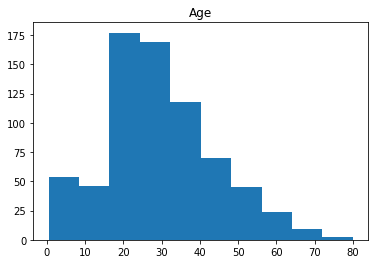

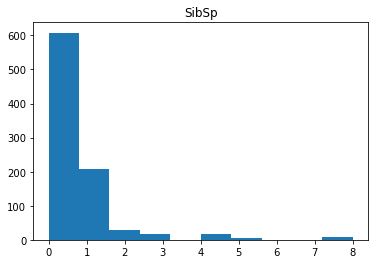

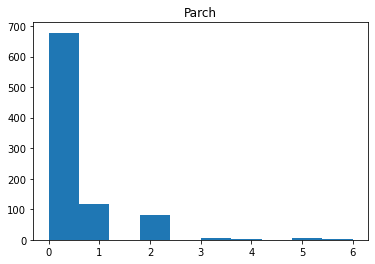

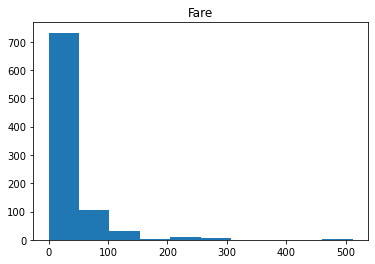

In [14]:
# distributions for all numeric variables 

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [15]:
df_num.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

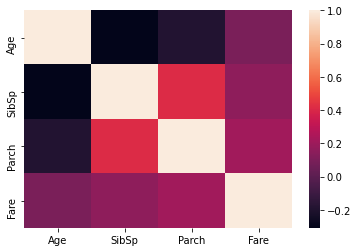

In [16]:
sns.heatmap(df_num.corr())

In [17]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(
    training,
    values=['Age', 'SibSp', 'Parch', 'Fare'],
    index='Survived',
    
    aggfunc='sum',
)

,Age,Fare,Parch,SibSp
Survived,,,,
0,12985.50,12142.7199,181,304
1,8219.67,16551.2294,159,162


In [18]:
df_cat['Survived'].unique()

array([0, 1], dtype=int64)

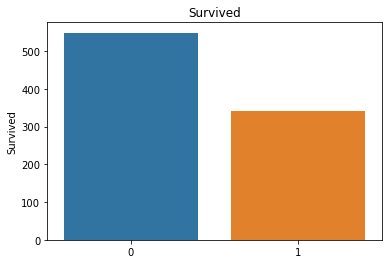

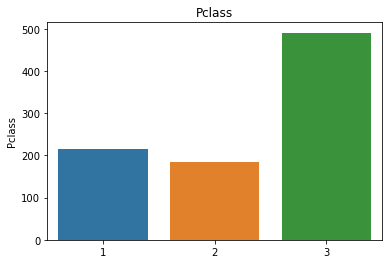

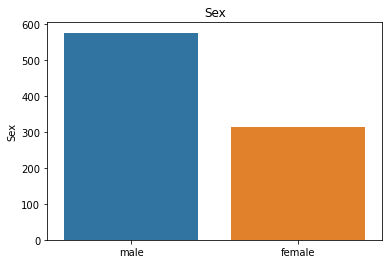

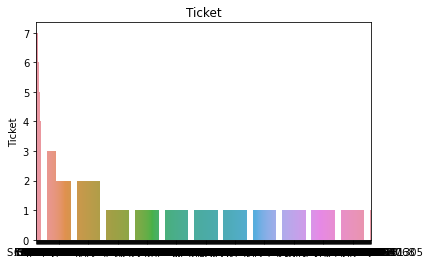

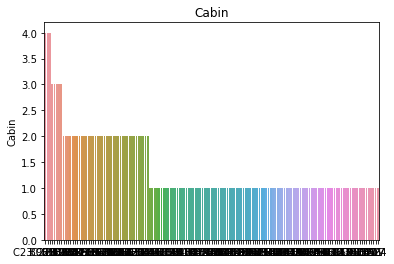

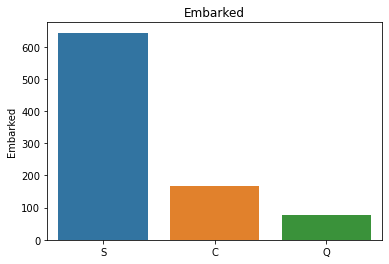

In [19]:
for i in df_cat.columns:
    #sns.barplot(x=df_cat[i].unique(),y=df_cat[i].value_counts()).set_title(i)
    sns.barplot(x=df_cat[i].value_counts().index,y=df_cat[i].value_counts()).set_title(i)
    plt.show()

Cabin and ticket graphs are very messy. This is an area where we may want to do some feature engineering!

In [20]:
# Comparing survival and each of these categorical variables 

print(pd.pivot_table(training,index='Survived',columns='Pclass',values='Ticket',aggfunc='count'))

print()

print(pd.pivot_table(training,index='Survived',columns='Sex',values='Ticket',aggfunc='count'))

print()

print(pd.pivot_table(training,index='Survived',columns='Embarked',values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [21]:
df_cat.columns


Index(['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

# Feature Engineering

1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)

2) Tickets - Do different ticket types impact survival rates?

3) Does a person's title relate to survival rates?

In [22]:
training["cabin_multiple"] = training["Cabin"].apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')) )
training["cabin_multiple"].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [23]:
pd.pivot_table(training,index='Survived',columns='cabin_multiple',values='Ticket',aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [24]:
# creates categories based on the cabin letter (n stands for null)
# in this case we will treat null values like it's own category

training['cabin_adv'] = training['Cabin'].apply(lambda x: str(x)[0])

training['cabin_adv'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64

In [25]:
#comparing surivial rate by cabin

pd.pivot_table(training,index = 'Survived',columns = 'cabin_adv',values='Ticket', aggfunc='count' )

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [26]:
# understand ticket values better 
# numeric vs non numeric 

training['numeric_ticket'] = training['Ticket'].apply(lambda x:1 if x.isnumeric() else 0)
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [27]:
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','') if len(x.split(' ')[:-1]) >0 else 0)

In [28]:
#pd.set_option("max_rows", None)
training['ticket_letters'].value_counts()

0            665
PC            60
CA            41
A5            21
STONO2        18
SOTONOQ       15
WC            10
SCPARIS        7
A4             7
SOC            6
FCC            5
C              5
SCParis        4
SOPP           3
PP             3
WEP            3
SOTONO2        2
SWPP           2
PPP            2
SCAH           2
AS             1
Fa             1
SCA4           1
SOP            1
SC             1
CASOTON        1
SCAHBasle      1
SCOW           1
FC             1
SP             1
Name: ticket_letters, dtype: int64

In [29]:
# difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [30]:
# survival rate across different tyicket types 
# lets us view all columns in dataframe through scrolling. This is for convenience 
pd.set_option("max_columns", None)
pd.pivot_table(training,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,A4,A5,AS,C,CA,CASOTON,FC,FCC,Fa,PC,PP,PPP,SC,SCA4,SCAH,SCAHBasle,SCOW,SCPARIS,SCParis,SOC,SOP,SOPP,SOTONO2,SOTONOQ,SP,STONO2,SWPP,WC,WEP
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,21.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,4.0,2.0,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,4.0,NaN,39.0,2.0,1.0,1.0,NaN,1.0,1.0,NaN,3.0,2.0,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [31]:
# feature engineering on person's title 
training['name_title'] = training['Name'].apply(lambda x:x.split(',')[1].split( )[0].strip())

training['name_title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Jonkheer.      1
Capt.          1
Lady.          1
Sir.           1
Don.           1
Mme.           1
the            1
Ms.            1
Name: name_title, dtype: int64

In [32]:
pd.pivot_table(training,index='Survived',columns='name_title', values = 'Ticket', aggfunc='count')

name_title,Capt.,Col.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


# Data Preprocessing for Model

1) Drop null values from Embarked (only 2) 

2) Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with)
Variables: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'
    

3) Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. We also may be able to infer something about the shape of the test data through this method. I will stress, this is generally not recommend outside of a competition (use onehot encoder).

4) Impute data with mean for fare and age (Should also experiment with median)

5) Normalized fare using logarithm to give more semblance of a normal distribution

6) Scaled data 0-1 with standard scaler

In [33]:
training.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
train_test          0
cabin_multiple      0
cabin_adv           0
numeric_ticket      0
ticket_letters      0
name_title          0
dtype: int64

In [34]:
#create all categorical variables that we did above for both training and test sets

all_data["cabin_multiple"] = all_data["Cabin"].apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')) )
all_data['cabin_adv'] = all_data['Cabin'].apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data['Ticket'].apply(lambda x:1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','') if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data['Name'].apply(lambda x:x.split(',')[1].split( )[0].strip())

In [35]:
all_data.isna().sum()

PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                263
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin             1014
Embarked             2
train_test           0
cabin_multiple       0
cabin_adv            0
numeric_ticket       0
ticket_letters       0
name_title           0
dtype: int64

In [36]:
# impute nulls for continuous data 

#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(training.Age.median())

#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

In [37]:
# drop null 'embarked' rows. Only 2 instances of this in training and 0 in test

all_data.dropna(subset =['Embarked'] , inplace=True )

<AxesSubplot:>

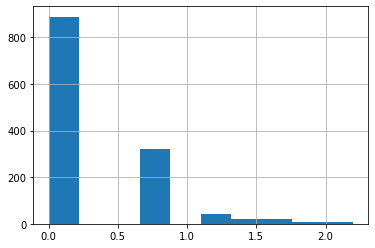

In [38]:
#tried log norm of sibsp (not used)

all_data['norm_SibSp'] = np.log(all_data['SibSp']+1)
all_data['norm_SibSp'].hist()

<AxesSubplot:>

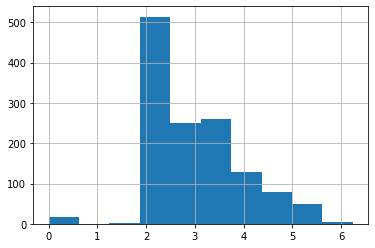

In [39]:
# log norm of fare (used)

all_data['norm_fare'] = np.log(all_data['Fare']+1)
all_data['norm_fare'].hist()

In [40]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'cabin_multiple', 'cabin_adv', 'numeric_ticket', 'ticket_letters',
       'name_title', 'norm_SibSp', 'norm_fare'],
      dtype='object')

In [41]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1307 non-null   int64  
 1   Survived        889 non-null    float64
 2   Pclass          1307 non-null   int64  
 3   Name            1307 non-null   object 
 4   Sex             1307 non-null   object 
 5   Age             1307 non-null   float64
 6   SibSp           1307 non-null   int64  
 7   Parch           1307 non-null   int64  
 8   Ticket          1307 non-null   object 
 9   Fare            1307 non-null   float64
 10  Cabin           293 non-null    object 
 11  Embarked        1307 non-null   object 
 12  train_test      1307 non-null   int64  
 13  cabin_multiple  1307 non-null   int64  
 14  cabin_adv       1307 non-null   object 
 15  numeric_ticket  1307 non-null   int64  
 16  ticket_letters  1307 non-null   object 
 17  name_title      1307 non-null   ob

In [42]:
all_data.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 1307, dtype: int64

In [43]:
# converted fare to category for pd.get_dummies()

all_data["Pclass"] = all_data["Pclass"].astype(str)

In [44]:
#created dummy variables from categories

all_dummies = pd.get_dummies(all_data[['Pclass','Sex','SibSp','Parch','Age','norm_fare','Embarked',
                                    'cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])



In [45]:
all_dummies.shape

(1307, 42)

In [46]:
#Split to train test again

X_train = all_dummies[all_dummies.train_test==1].drop(['train_test'],axis=1)
X_test = all_dummies[all_dummies.train_test==0].drop(['train_test'],axis=1)

y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

In [47]:
all_dummies[['Age','SibSp','Parch','norm_fare']]

,Age,SibSp,Parch,norm_fare
0,22.0,1,0,2.110213
1,38.0,1,0,4.280593
2,26.0,0,0,2.188856
3,35.0,1,0,3.990834
4,35.0,0,0,2.202765
...,...,...,...,...
413,28.0,0,0,2.202765
414,39.0,0,0,4.699571
415,38.5,0,0,2.110213
416,28.0,0,0,2.202765


In [48]:
# Scale data

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

all_dummies_scaled = all_dummies.copy()

all_dummies_scaled[['Age','SibSp','Parch','norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])

In [49]:
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]

,Age,SibSp,Parch,norm_fare
0,-0.580261,0.480272,-0.445407,-0.896331
1,0.662297,0.480272,-0.445407,1.347870
2,-0.269621,-0.479537,-0.445407,-0.815013
3,0.429318,0.480272,-0.445407,1.048255
4,0.429318,-0.479537,-0.445407,-0.800632
...,...,...,...,...
413,-0.114301,-0.479537,-0.445407,-0.800632
414,0.739957,-0.479537,-0.445407,1.781098
415,0.701127,-0.479537,-0.445407,-0.896331
416,-0.114301,-0.479537,-0.445407,-0.800632


In [50]:
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Model Building (Baseline Validation Performance)¶

Before going further, I like to see how various different models perform with default parameters. I tried the following models using 5 fold cross validation to get a baseline. With a validation set basline, we can see how much tuning improves each of the models. Just because a model has a high basline on this validation set doesn't mean that it will actually do better on the eventual test set.

## Naive Bayes (75.3%)
## Logistic Regression (82.0%)
## Decision Tree (76.2%)
## K Nearest Neighbor (50.2%)
## Random Forest (81.5%)
## Support Vector Classifier (61.7%)
## Soft Voting Classifier - All Models (77.6%)

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [76]:
#I usually use Naive Bayes as a baseline for my classification tasks 

gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [77]:
lr = LogisticRegression( max_iter=2000 )
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [78]:
dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.75280899 0.84269663 0.74157303 0.83615819]
0.7863327620135847


In [79]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


In [80]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.79775281 0.85393258 0.73595506 0.81920904]
0.8054148416174696


In [81]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [82]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such


voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),
                                            ('svc',svc)], voting = 'soft')
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.82022472 0.83146067 0.79775281 0.83615819]
0.8166698406652702


# Model Tuned Performance

After getting the baselines, let's see if we can improve on the indivdual model results!I mainly used grid search to tune the models. I also used Randomized Search for the Random Forest to simplify testing time.

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [84]:
#simple performance reporting function

def clf_performance(classifier,model_name):
    print('Model Name : ',model_name)
    print("Best Score : " + str(classifier.best_score_))
    print("Best Parameters : " + str(classifier.best_params_))

In [85]:
lr = LogisticRegression()
param_grid = {'penalty': ['l1','l2'],
              'max_iter' : [1000],
              'C' : np.logspace(-4,4,20),
              'solver' : ['liblinear'] 
             }
clf_lr = GridSearchCV(lr,param_grid=param_grid)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Model Name :  Logistic Regression
Best Score : 0.8279375357074843
Best Parameters : {'C': 1.623776739188721, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


In [86]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7],
              'weights' : ['uniform','distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]   
}
clf_knn = GridSearchCV(knn,param_grid=param_grid)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'K Neighbors Classifier')

Model Name :  K Neighbors Classifier
Best Score : 0.8279375357074843
Best Parameters : {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [87]:
svc = SVC(probability = True)
param_grid = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],'C': [.1, 1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
              {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}  
             ]
clf_svc = GridSearchCV(svc,param_grid=param_grid)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'K Neighbors Classifier')

Model Name :  K Neighbors Classifier
Best Score : 0.8335555132355742
Best Parameters : {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [88]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
               'bootstrap': [True,False],
               'max_depth': [3,5,10,20,50,75,100,None],
               'max_features': ['auto','sqrt'],
               'min_samples_leaf': [1,2,4,10],
               'min_samples_split': [2,5,10]
              }
clf_rf_rnd = RandomizedSearchCV(rf,param_distributions = param_grid)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest Classifier')

Model Name :  Random Forest Classifier
Best Score : 0.8313083222243384
Best Parameters : {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}


In [89]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,150], 
               'bootstrap': [True],
               'max_depth': [50,75,100,None],
               'max_features': ['auto'],
               'min_samples_leaf': [1,2],
               'min_samples_split': [5,10]
              }
clf_rf = GridSearchCV(rf,param_grid = param_grid)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest Classifier')

Model Name :  Random Forest Classifier
Best Score : 0.8346727607439852
Best Parameters : {'bootstrap': True, 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


<AxesSubplot:>

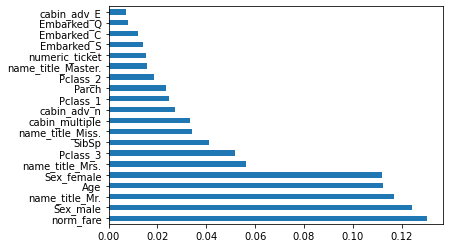

In [90]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

# Model Additional Ensemble Approaches¶

1) Experimented with a hard voting classifier of three estimators (KNN, SVM, RF)

2) Experimented with a soft voting classifier of three estimators (KNN, SVM, RF)

3) Experimented with soft voting on all estimators

4) Experimented with soft voting on all estimators

In [91]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_


In [92]:
voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 


print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=5).mean())


voting_clf_hard : [0.78651685 0.81460674 0.83146067 0.80337079 0.83050847]
voting_clf_hard mean : 0.8132927061512094
voting_clf_soft : [0.78089888 0.82022472 0.82022472 0.79775281 0.85310734]
voting_clf_soft mean : 0.8133180981400369
voting_clf_all : [0.80898876 0.8258427  0.8258427  0.80898876 0.85875706]
voting_clf_all mean : 0.8256839966990415


In [93]:
#in a soft voting classifier you can weight some models more than others. I used a grid search to explore different weightings
#no new results here
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train_scaled,y_train)
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test_scaled)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Model Name :  VC Weights
Best Score : 0.832450961721577
Best Parameters : {'weights': [2, 2, 1]}


In [94]:
#Make Predictions 

voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)


best_rf.fit(X_train_scaled, y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_rf = best_rf.predict(X_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)


In [95]:
#convert output to dataframe 
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)


final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all}
comparison = pd.DataFrame(data=final_data_comp)

In [96]:
#track differences between outputs 
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [97]:
comparison.difference_hard_all.value_counts()

0    409
1      9
Name: difference_hard_all, dtype: int64

In [98]:
#prepare submission files 
submission.to_csv('submission_rf.csv', index =False)
submission_2.to_csv('submission_vc_hard.csv',index=False)
submission_3.to_csv('submission_vc_soft.csv', index=False)
submission_4.to_csv('submission_vc_all.csv', index=False)
